<a href="https://colab.research.google.com/github/sneha2003er/project/blob/main/CNN_model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load images
train_fire_images = '/content/drive/MyDrive/data/dataset/img_data/train/fire'
train_default_images = '/content/drive/MyDrive/data/dataset/img_data/train/default'
train_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/train/smoke'

test_fire_images = '/content/drive/MyDrive/data/dataset/img_data/test/fire'
test_default_images ='/content/drive/MyDrive/data/dataset/img_data/test/default'
test_smoke_images = '/content/drive/MyDrive/data/dataset/img_data/test/smoke'

In [ ]:
# load videos
train_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'
test_videos = '/content/drive/MyDrive/data/dataset/video_data/test_videos'

## Import Libraries

In [ ]:
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=7a7936dd60b8c4a90139deb1aa76579112d63446f4f27e487208251a6cc391fd
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
from playsound import playsound
import smtplib


## Preprocess the Image Data:

In [ ]:
# Reloading the images for the CNN without flattening and normalizing
def load_images_for_cnn(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), target_size=(64, 64))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)


## alarm and email notification:

In [ ]:
# Sound alarm
def sound_alarm():
    """Play an alarm sound."""
    playsound('alarm.mp3')


In [ ]:
# Send Email Notification
def send_email_notification(subject, message, to_email):
    from_email = 'your_email@gmail.com'
    from_password = 'your_password'
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(from_email, from_password)
    email_message = f"Subject: {subject}\n\n{message}"
    server.sendmail(from_email, to_email, email_message)
    server.quit()

In [ ]:
# Evaluate Predictions
def evaluate_predictions(y_true, y_pred):
    for true, pred in zip(y_true, y_pred):
        if pred == "fire":
            sound_alarm()
            send_email_notification("Fire Alert!", "Fire detected by our system. Please check immediately.", "receiver_email@example.com")
            break

In [ ]:
# Encoding labels: fire->0, default->1, smoke->2
label_dict = {"fire": 0, "default": 1, "smoke": 2}

In [ ]:
# Load datasets
X_train_fire, y_train_fire = load_images_for_cnn(train_fire_images, label_dict["fire"])
X_train_default, y_train_default = load_images_for_cnn(train_default_images, label_dict["default"])
X_train_smoke, y_train_smoke = load_images_for_cnn(train_smoke_images, label_dict["smoke"])

X_test_fire, y_test_fire = load_images_for_cnn(test_fire_images, label_dict["fire"])
X_test_default, y_test_default = load_images_for_cnn(test_default_images, label_dict["default"])
X_test_smoke, y_test_smoke = load_images_for_cnn(test_smoke_images, label_dict["smoke"])


In [ ]:
# Concatenate datasets
X_train = np.vstack((X_train_fire, X_train_default, X_train_smoke))
y_train = np.hstack((y_train_fire, y_train_default, y_train_smoke))

X_test = np.vstack((X_test_fire, X_test_default, X_test_smoke))
y_test = np.hstack((y_test_fire, y_test_default, y_test_smoke))


In [ ]:
# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Create the CNN Model:

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: fire, default, smoke
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

## Model Visualization:

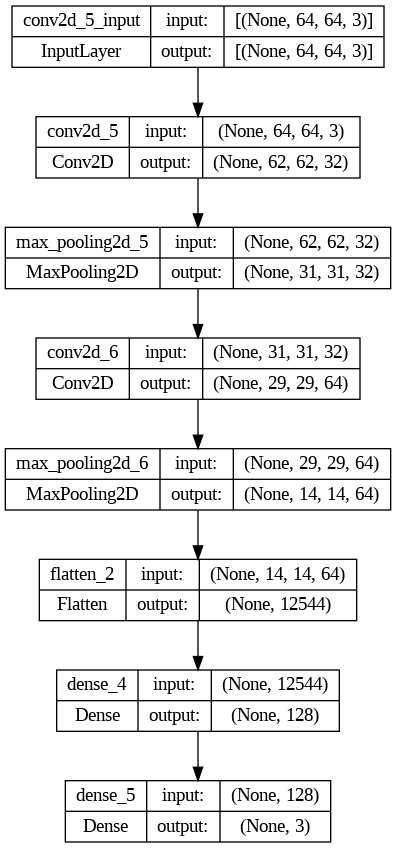

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

##  Train the Model:

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
41/41 [==============================] - 8s 178ms/step - loss: 0.8360 - accuracy: 0.6293 - val_loss: 0.7940 - val_accuracy: 0.6071
Epoch 2/10
41/41 [==============================] - 9s 227ms/step - loss: 0.5202 - accuracy: 0.8040 - val_loss: 0.8944 - val_accuracy: 0.5873
Epoch 3/10
41/41 [==============================] - 7s 172ms/step - loss: 0.3934 - accuracy: 0.8612 - val_loss: 1.2348 - val_accuracy: 0.4722
Epoch 4/10
41/41 [==============================] - 9s 217ms/step - loss: 0.3337 - accuracy: 0.8810 - val_loss: 0.9931 - val_accuracy: 0.6151
Epoch 5/10
41/41 [==============================] - 8s 195ms/step - loss: 0.2820 - accuracy: 0.8909 - val_loss: 1.0744 - val_accuracy: 0.5873
Epoch 6/10
41/41 [==============================] - 8s 194ms/step - loss: 0.1928 - accuracy: 0.9344 - val_loss: 1.4017 - val_accuracy: 0.5119
Epoch 7/10
41/41 [==============================] - 9s 219ms/step - loss: 0.1630 - accuracy: 0.9451 - val_loss: 1.2648 - val_accuracy: 0.5992
Epoch 

##  Evaluate the Model on Entire Dataset:

In [ ]:
_, overall_accuracy = model.evaluate(np.vstack((X_train, X_test)), np.vstack((y_train, y_test)))
print(f"Overall Accuracy using CNN: {overall_accuracy}")

49/49 [==============================] - 2s 42ms/step - loss: 0.2935 - accuracy: 0.9264
Overall Accuracy using CNN: 0.9264235496520996


## Plot a Confusion Matrix:

49/49 [==============================] - 2s 48ms/step


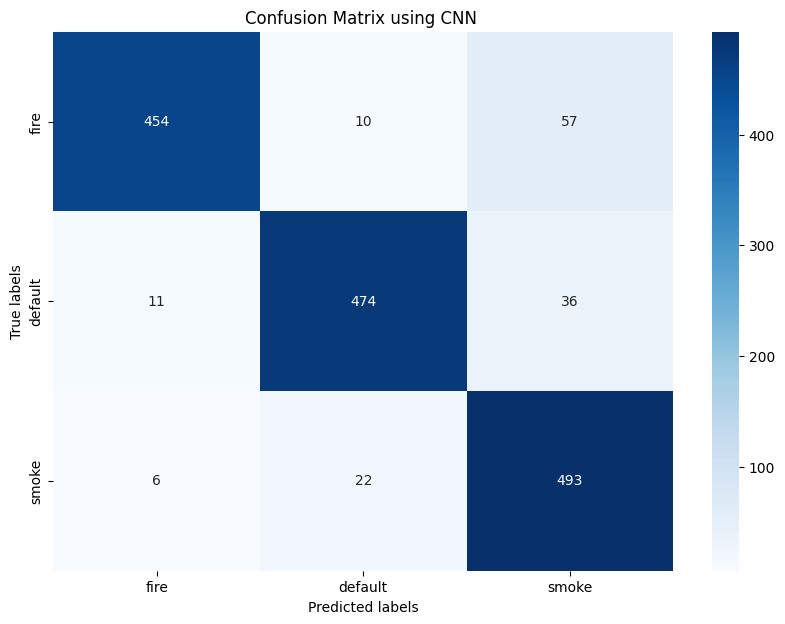

In [ ]:
# Predict
y_pred = model.predict(np.vstack((X_train, X_test)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(np.vstack((y_train, y_test)), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["fire", "default", "smoke"],
            yticklabels=["fire", "default", "smoke"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix using CNN ')
plt.show()